In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
pd.set_option('precision', 2)
pd.set_option('max_rows', 300)
pd.options.display.float_format = '{:,.2f}'.format

In [104]:
base_loc = '/Users/rbekbolatov/tmp/Navi_compare/'

---

# contact_impression

#### Navi
```sql
select 'passed' as filter, 'navi' as system, event_date, contact_type, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type    

union all    

select 'blocked' as filter, 'navi' as system, event_date, contact_type, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, contact_type, count(1) as cnt from src.weblog where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type    

union all    

select 'blocked' as filter, 'prod' as system, event_date, contact_type, count(1) as cnt from  src.weblog_blocked where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type
```

In [105]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'ci_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})    

contacts = a.pivot_table('cnt', index=['event_date', 'contact_type'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

#contacts['change', 'passed'] = contacts['change_abs', 'passed'] / contacts['prod', 'passed']
#contacts['change', 'blocked'] = contacts['change_abs', 'blocked'] / contacts['prod', 'blocked']
#contacts['change', 'total'] = contacts['change_abs', 'total'] / contacts['prod', 'total']

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

contact_impressions = contacts

contact_impressions.sort_index(inplace=True)
contact_impressions.to_html('contact_impression.html')

contact_impressions

system                    prod                  navi                 \
filter                   total passed blocked  total passed blocked   
event_date contact_type                                               
2015-09-25 email           726    707      19    859    821      38   
           phone          4546   4168     378   4546   4220     326   
           website        6368   6287      81   6296   6205      91   
2015-09-26 email           424    417       7    487    487       0   
           phone           898    850      48    898    880      18   
           website        3518   3452      66   3421   3404      17   
2015-09-27 email           451    451       0    548    546       2   
           phone           504    499       5    504    499       5   
           website        4089   3963     126   3960   3895      65   
2015-09-28 email          1263   1261       2   1489   1443      46   
           phone          6501   6301     200   6501   6364     137   
           website       10265  10170      95  10169  10024     145   
2015-09-29 email          1203   1202       1   1434   1428       6   
           phone          5988   5575     413   5988   5641     347   
           website       10310  10242      68  10286  10157     129   

system                  change_abs                 change                    
filter                       total passed blocked   total  passed   blocked  
event_date contact_type                                                      
2015-09-25 email               133    114      19  18.32%  16.12%   100.00%  
           phone                 0     52     -52   0.00%   1.25%   -13.76%  
           website             -72    -82      10  -1.13%  -1.30%    12.35%  
2015-09-26 email                63     70      -7  14.86%  16.79%  -100.00%  
           phone                 0     30     -30   0.00%   3.53%   -62.50%  
           website             -97    -48     -49  -2.76%  -1.39%   -74.24%  
2015-09-27 email                97     95       2  21.51%  21.06%      inf%  
           phone                 0      0       0   0.00%   0.00%     0.00%  
           website            -129    -68     -61  -3.15%  -1.72%   -48.41%  
2015-09-28 email               226    182      44  17.89%  14.43%  2200.00%  
           phone                 0     63     -63   0.00%   1.00%   -31.50%  
           website             -96   -146      50  -0.94%  -1.44%    52.63%  
2015-09-29 email               231    226       5  19.20%  18.80%   500.00%  
           phone                 0     66     -66   0.00%   1.18%   -15.98%  
           website             -24    -85      61  -0.23%  -0.83%    89.71%

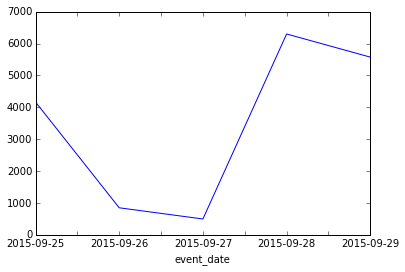

In [84]:
huy = contact_impressions.swaplevel(0,1).sort().ix['phone'][[('prod', 'passed'), ('change', 'passed')]]
huy[('prod', 'passed')].plot()
#huy[('change', 'passed')].plot(secondary_y=True)


---

# event_type

#### Navi

```sql
select 'passed' as filter, 'navi' as system, event_date, event_type, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' group by event_date, event_type order by event_type

union all

select 'blocked' as filter, 'navi' as system, event_date, event_type, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' group by event_date, event_type order by event_type
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, event_type, count(1) as cnt from src.weblog where event_date > '2015-09-24' group by event_date, event_type order by event_type   

union all   

select 'blocked' as filter, 'prod' as system, event_date, event_type, count(1) as cnt from src.weblog_blocked where event_date > '2015-09-24' group by event_date, event_type order by event_type
```

In [ ]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'et_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})    

contacts = a.pivot_table('cnt', index=['event_date', 'event_type'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

events = contacts
events.to_html('event_type.html')

In [ ]:
events

---

# professional_impression

#### Navi
```sql
select 'passed' as filter, 'navi' as system, event_date, category, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category

union all

select 'blocked' as filter, 'navi' as system, event_date, category, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, category, count(1) as cnt from src.weblog where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category   

union all   

select 'blocked' as filter, 'prod' as system, event_date, category, count(1) as cnt from src.weblog_blocked where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category
```

In [ ]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'pi_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})  

contacts = a.pivot_table('cnt', index=['event_date', 'category'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

professional_impressions = contacts

professional_impressions.reset_index(inplace=True)
professional_impressions.sort(columns=['event_date', ('prod', 'total')], ascending=(True, False), inplace=True)
professional_impressions.set_index(keys=['event_date', 'category'], inplace=True)

professional_impressions.to_html('professional_impression.html')

In [ ]:
professional_impressions

In [ ]:
page_type_navi = pd.read_csv(base_loc + 'pv_navi.csv', skiprows=1, names=['page_type', 'count'])
page_type_prod = pd.read_csv(base_loc + 'pv_prod.csv', skiprows=1, names=['page_type', 'count'])

page_type_counts = page_type_navi.merge(page_type_prod, on='page_type', suffixes=['_navi', '_prod'])

page_type_counts['change_abs'] = page_type_counts['count_navi'] - page_type_counts['count_prod']
page_type_counts['change'] = ["{0:.2f}%".format(val * 100)  for val in page_type_counts['change_abs'] / page_type_counts['count_prod']]

page_type_counts.sort(columns='page_type', inplace=True, ascending=True)

page_type_counts.set_index('page_type', inplace=True)
page_type_counts

# ACV

```sql
select 

attribution_date,

sum(ad_click_count) as ad_click_count,
sum(ad_click_value) as ad_click_value, 

sum(email_associated_count) as email_associated_count,
sum(email_non_associated_count) as email_non_associated_count,
sum(email_attributed_count) as email_attributed_count,
sum(email_attributed_value) as email_attributed_value,

sum(website_associated_count) as website_associated_count,
sum(website_non_associated_count) as website_non_associated_count,
sum(website_attributed_count) as website_attributed_count,
sum(website_attributed_value) as website_attributed_value,

sum(phone_associated_count) as phone_associated_count,
sum(phone_associated_value) as phone_associated_value, 

sum(phone_non_associated_count) as phone_non_associated_count,
sum(phone_non_associated_value) as phone_non_associated_value, 

sum(phone_attributed_count) as phone_attributed_count,
sum(phone_attributed_value) as phone_attributed_value, 

sum(total_attributed_value) as total_attributed_value, 
sum(adjusted_attribution_value) as adjusted_attribution_value

from webanalytics_attribution 
where attribution_date >= '2015-09-26'
group by attribution_date;
```

In [171]:
acv_navi = pd.read_csv(base_loc + 'acv_navi.csv')
acv_navi['system'] = 'Navi'
acv_prod = pd.read_csv(base_loc + 'acv_prod.csv')
acv_prod['system'] = 'Prod'

acv = pd.concat([acv_navi, acv_prod]).set_index(['attribution_date', 'page_type', 'system'])

In [172]:
acv.drop([col for col in acv.columns if col.endswith('value')], axis=1, inplace=True)
acv.drop([col for col in acv.columns if 'attributed' in col], axis=1, inplace=True)

In [173]:
acv = acv.stack().unstack(level=2).dropna()

acv['diff_abs'] = acv['Navi'] - acv['Prod']
acv['diff'] = ["{0:.2f}%".format(val * 100)  for val in acv['diff_abs']/acv['Prod']]

acv = acv[['Prod', 'Navi', 'diff_abs', 'diff']]
acv.to_html('acv.html')

In [188]:
acv.ix['2015-09-30'].swaplevel(0,1).sort_index().groupby(level=[0]).sum()

system,Prod,Navi,diff_abs
ad_click_count,"3,217.00","3,164.00",-53.00
email_associated_count,105.00,109.00,4.00
email_non_associated_count,234.00,293.00,59.00
website_associated_count,"1,963.00","3,160.00","1,197.00"
website_non_associated_count,"3,862.50","4,162.00",299.50
phone_associated_count,"9,201.00","9,395.00",194.00
phone_non_associated_count,"10,270.62","11,089.00",818.38


In [ ]:
acv.ix['2015-09-29'].swaplevel(0,1).sort_index().sum

# Webanalytics - by page_type

In [112]:
acv_navi = pd.read_csv(base_loc + 'page_type_navi.csv')
acv_navi['system'] = 'Navi'
acv_prod = pd.read_csv(base_loc + 'page_type_prod.csv')
acv_prod['system'] = 'Prod'

acv = pd.concat([acv_navi, acv_prod]) #.set_index(['system'])


In [117]:
acv.pivot_table('_c1', columns=['system'], index=['page_type'])

system,Navi,Prod
page_type,,
Attorney_Directory_Browse,12676,12471
Attorney_Directory_Launch,121,115
Attorney_Profile,20691,19710
Attorney_Profile_Aboutme,568,554
Attorney_Profile_Endorsement,615,645
Attorney_Profile_Review,6045,5902
Attorney_Search,98,327
Legal_Answers_Detail,30587,29016
Legal_Guides_Detail,9166,8853


In [114]:
acv.pivot_table('_c1', columns=['system'])

system
Navi    6948.4
Prod    6189.6
Name: _c1, dtype: float64